# Projeto Semantix

Projeto proposto pelo curso de Data Science da Semantix feito por Leonardo Yojo em 05/12/2022

Análise dos microdados do Enem 2021:

Para baixar os dados acesse https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

Por favor veja o relatório em pdf produzido a partir da análise feita abaixo


In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_completo = pd.read_csv(filepath_or_buffer = "/microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv", sep = ";", encoding = "latin1")

In [3]:
#Obs.: O treinamento dos modelos foi feita com uma amostra de 100000
df = df_completo.sample(n=100000, random_state=10)
df.to_csv("microdados_enem_2021_amostra.csv", sep = ";", encoding = "latin1")

## Informações iniciais

In [4]:
df=df_completo

In [5]:
#visualização inicial dos dados
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
5,210052391248,2021,10,F,1,3,1,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2303501,Cascavel,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,F,B,1.0,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,B
6,210052615524,2021,9,F,0,3,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4321600,Tramandaí,43,RS,0,1,1,0,NaN,881.0,892.0,NaN,NaN,511.9,420.4,NaN,NaN,BBDDABEBACCBBAECEBABAEEBEDBAEBADAEEDAEDDCABBE,99999ADCCEDDADCDECCBAAAEDEACADBDABEEBDAAECDDAE...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBB

In [6]:
#informações dos atributos do conjunto de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [7]:
#resumo das estatísticas do conjunto de dados
df.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,3.389832e+06,3389832.0,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,1.096828e+06,3.389832e+06,8.138060e+05,813806.000000,813806.000000,813806.000000,813806.000000,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,2.245844e+06,2.378379e+06,2.378379e+06,2.245844e+06,2.245844e+06,2.378379e+06,2.378379e+06,2.245844e+06,3.389832e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,3.389830e+06
mean,2.100527e+11,2021.0,5.306013e+00,1.052073e+00,2.043491e+00,1.027106e+00,1.608430e+00,2.581980e+00,1.396214e+00,1.006295e+00,1.289710e-01,3.182762e+06,31.681298,2.469393,1.034867,1.015533,3.104218e+06,3.089625e+01,6.633786e-01,7.040145e-01,7.040145e-01,6.633786e-01,9.160518e+02,8.867477e+02,8.966545e+02,9.061433e+02,4.917857e+02,5.199434e+02,5.025556e+02,5.350802e+02,4.704640e-01,1.140684e+00,1.192657e+02,1.380269e+02,1.153117e+02,1.281853e+02,1.127109e+02,6.135005e+02,3.739557e+00
std,9.962403e+05,0.0,3.902871e+00,4.129414e-01,1.022561e+00,2.049293e-01,7.198306e-01,4.278731e+00,5.938455e-01,7.909361e-02,3.351679e-01,1.041348e+06,10.387891,0.939162,0.183443,0.197323,1.011035e+06,1.008222e+01,4.734579e-01,4.590982e-01,4.590982e-01,4.734579e-01,2.586309e+01,2.788652e+01,2.751352e+01,2.621196e+01,8.056676e+01,9.579050e+01,7.916405e+01,1.106267e+02,4.991269e-01,7.910804e-01,3.391962e+01,4.563224e+01,3.634138e+01,3.883252e+01,6.005667e+01,1.907142e+02,1.378942e+00
min,2.100510e+11,2021.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100015e+06,11.000000,1.000000,1.000000,1.000000,1.100015e+06,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.090000e+02,8.790000e+02,8.890000e+02,8.990000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.100519e+11,2021.0,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.312908e+06,23.000000,2.000000,1.000000,1.000000,2.408003e+06,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.100000e+02,8.800000e+02,8.900000e+02,9.000000e+02,4.310000e+02,4.454000e+02,4.476000e+02,4.447000e+02,0.000000e+00,1.000000e+00,1.000000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.200000e+02,3.000000e+00
50%,2.100527e+11,2021.0,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.170107e+06,31.000000,2.000000,1.000000,1.000000,3.122306e+06,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.110000e+02,8.810000e+02,8.910000e+02,9.010000e+02,4.820000e+02,5.219000e+02,5.059000e+02,5.154000e+02,0.000000e+00,1.000000e+00,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.000000e+02,4.000000e+00
75%,2.100536e+11,2021.0,7.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,3.550308e+06,35.000000,4.000000,1.000000,1.000000,3.550308e+06,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.120000e+02,8.820000e+02,8.920000e+02,9.020000e+02,5.458000e+02,5.893000e+02,5.588000e+02,6.139000e+02,1.000000e+00,1.000000e+00,1.400000e+02,1.800000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.400000e+02,4.000000e+00
max,2.100545e+

In [8]:
print("{} alunos tiveram redação anulada".format(df[df["NU_NOTA_REDACAO"]==0].NU_INSCRICAO.count())) #número de redações anuladas
print("{} alunos tiveram redação sem problema".format(df[df["TP_STATUS_REDACAO"]==1].NU_INSCRICAO.count())) #número de redações sem problemas
print("{} alunos tiveram prova de Ciências da Natureza zerados".format(df[df["NU_NOTA_CN"]==0].NU_INSCRICAO.count())) #número de provas de Ciências da Natureza zerados
print("{} alunos tiveram prova de Ciências Humanas zerados".format(df[df["NU_NOTA_CH"]==0].NU_INSCRICAO.count())) #número de provas de Ciências Humanas zerados
print("{} alunos tiveram prova de Linguagens e Códigos zerados".format(df[df["NU_NOTA_LC"]==0].NU_INSCRICAO.count())) #número de provas de Linguagens e Códigos zerados
print("{} alunos tiveram prova de Matemática zerados".format(df[df["NU_NOTA_MT"]==0].NU_INSCRICAO.count())) #número de provas de Matemática zerados
print("{} alunos faltaram na prova de Ciências da Natureza".format(df[df["TP_PRESENCA_CN"]==0].NU_INSCRICAO.count())) #número de alunos faltantes na prova de Ciências da Natureza
print("{} alunos faltaram na prova de Ciências Humanas".format(df[df["TP_PRESENCA_CH"]==0].NU_INSCRICAO.count())) #número de alunos faltantes na prova de Ciências Humanas
print("{} alunos faltaram na prova de Linguagens e Códigos".format(df[df["TP_PRESENCA_LC"]==0].NU_INSCRICAO.count())) #número de alunos faltantes na prova de Linguagens e Códigos
print("{} alunos faltaram na prova de Matemática".format(df[df["TP_PRESENCA_MT"]==0].NU_INSCRICAO.count())) #número de alunos faltantes na prova de Matemática
print("{} alunos inscritos do sexo masculino".format(df[df["TP_SEXO"]=="M"].NU_INSCRICAO.count())) #número de alunos do sexo masculino
print("{} alunos inscritos do sexo feminino".format(df[df["TP_SEXO"]=="F"].NU_INSCRICAO.count())) #número de alunos do sexo feminino
print("{} alunos inscritos que informaram vir de escola particular".format(df[df["TP_ESCOLA"]==3].NU_INSCRICAO.count())) #número de alunos que informaram vir de escola particular
print("{} alunos inscritos que informaram vir de escola pública".format(df[df["TP_ESCOLA"]==2].NU_INSCRICAO.count())) #número de alunos que informaram vir de escola pública

84582 alunos tiveram redação anulada
2293797 alunos tiveram redação sem problema
393 alunos tiveram prova de Ciências da Natureza zerados
4632 alunos tiveram prova de Ciências Humanas zerados
2248 alunos tiveram prova de Linguagens e Códigos zerados
453 alunos tiveram prova de Matemática zerados
1142539 alunos faltaram na prova de Ciências da Natureza
1007397 alunos faltaram na prova de Ciências Humanas
1007397 alunos faltaram na prova de Linguagens e Códigos
1142539 alunos faltaram na prova de Matemática
1299306 alunos inscritos do sexo masculino
2090526 alunos inscritos do sexo feminino
192244 alunos inscritos que informaram vir de escola particular
958611 alunos inscritos que informaram vir de escola pública


## Exploração dos dados
Nesta parte foram levantados diversos gráficos para melhor visualizar e compreender os dados.

C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/3152708098.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["CO_REGIAO"] = df_aux["CO_MUNICIPIO_PROVA"].values/1000000
C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/3152708098.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["CO_REGIAO"] = df_aux["CO_REGIAO"].astype(int)
C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/3152708098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

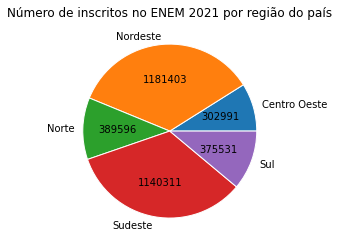

In [9]:
#Gráfico de pizza de inscritos por região
regiao_dic = {1:"Norte", 2:"Nordeste", 3:"Sudeste", 4:"Sul", 5:"Centro Oeste"}
df_aux = df[["NU_INSCRICAO", "CO_MUNICIPIO_PROVA"]]
df_aux["CO_REGIAO"] = df_aux["CO_MUNICIPIO_PROVA"].values/1000000
df_aux["CO_REGIAO"] = df_aux["CO_REGIAO"].astype(int)
df_aux["REGIAO"] = df_aux["CO_REGIAO"].apply(lambda x: regiao_dic[x])
df_aux = df_aux.groupby("REGIAO",as_index=False).agg(CONT_REGIAO=("NU_INSCRICAO","count"))

fig, ax = plt.subplots()
ax.pie(df_aux["CONT_REGIAO"], labels=df_aux["REGIAO"], autopct=lambda x:'{:.0f}'.format(x*df_aux["CONT_REGIAO"].values.sum()/100), wedgeprops={"linewidth":1, "edgecolor":"white"}, frame=False)
ax.set_title("Número de inscritos no ENEM 2021 por região do país")
plt.show()

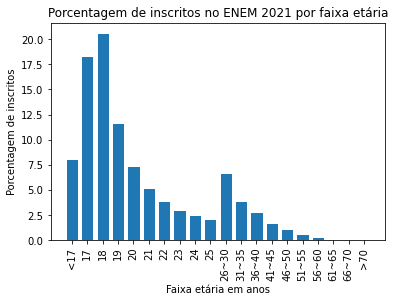

In [10]:
#Gráfico barras faixa etária dos inscritos
faixa_etaria_dic = {1:"<17", 2:"17", 3:"18", 4:"19", 5:"20", 6:"21", 7:"22", 8:"23", 9:"24", 10:"25", 11:"26~30", 12:"31~35",
                    13:"36~40", 14:"41~45", 15:"46~50", 16:"51~55", 17:"56~60", 18:"61~65", 19:"66~70", 20:">70"}
total_inscritos = df["NU_INSCRICAO"].count()
df_aux = df[["NU_INSCRICAO", "TP_FAIXA_ETARIA"]]
df_aux = df_aux.groupby("TP_FAIXA_ETARIA", as_index=False).agg(CONT_FAIXA_ETARIA=("NU_INSCRICAO","count"))
df_aux["FAIXA_ETARIA"] = df_aux["TP_FAIXA_ETARIA"].apply(lambda x: faixa_etaria_dic[x])

fig, ax = plt.subplots()
ax.bar(df_aux["FAIXA_ETARIA"] ,df_aux["CONT_FAIXA_ETARIA"]*100/total_inscritos, edgecolor="white")
plt.xticks(rotation=90)
ax.set_title("Porcentagem de inscritos no ENEM 2021 por faixa etária")
plt.ylabel("Porcentagem de inscritos")
plt.xlabel("Faixa etária em anos")
plt.show()

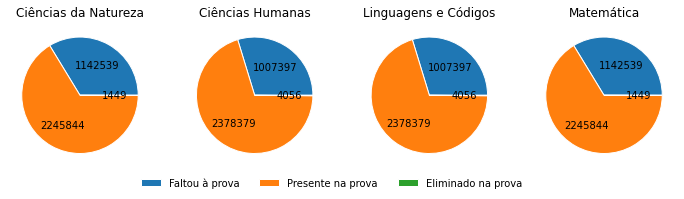

In [11]:
#Gráfico pizza de presença em cada prova objetiva
presenca_dic = {0:"Faltou à prova", 1:"Presente na prova", 2:"Eliminado na prova"}
df_aux1 = df[["NU_INSCRICAO", "TP_PRESENCA_CN"]]
df_aux1 = df_aux1.groupby("TP_PRESENCA_CN", as_index=False).agg(CONT_PRESENCA_CN=("NU_INSCRICAO","count"))
df_aux1["PRESENCA_CN"] = df_aux1["TP_PRESENCA_CN"].apply(lambda x: presenca_dic[x])

df_aux2 = df[["NU_INSCRICAO", "TP_PRESENCA_CH"]]
df_aux2 = df_aux2.groupby("TP_PRESENCA_CH", as_index=False).agg(CONT_PRESENCA_CH=("NU_INSCRICAO","count"))
df_aux2["PRESENCA_CH"] = df_aux2["TP_PRESENCA_CH"].apply(lambda x: presenca_dic[x])

df_aux3 = df[["NU_INSCRICAO", "TP_PRESENCA_LC"]]
df_aux3 = df_aux3.groupby("TP_PRESENCA_LC", as_index=False).agg(CONT_PRESENCA_LC=("NU_INSCRICAO","count"))
df_aux3["PRESENCA_LC"] = df_aux3["TP_PRESENCA_LC"].apply(lambda x: presenca_dic[x])

df_aux4 = df[["NU_INSCRICAO", "TP_PRESENCA_MT"]]
df_aux4 = df_aux4.groupby("TP_PRESENCA_MT", as_index=False).agg(CONT_PRESENCA_MT=("NU_INSCRICAO","count"))
df_aux4["PRESENCA_MT"] = df_aux4["TP_PRESENCA_MT"].apply(lambda x: presenca_dic[x])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_figwidth(12)
fig.set_figheight(4)
ax1.pie(df_aux1["CONT_PRESENCA_CN"], autopct=lambda x:'{:.0f}'.format(x*df_aux1["CONT_PRESENCA_CN"].values.sum()/100), wedgeprops={"linewidth":1, "edgecolor":"white"}, frame=False)
ax1.set_title("Ciências da Natureza")
ax2.pie(df_aux2["CONT_PRESENCA_CH"], autopct=lambda x:'{:.0f}'.format(x*df_aux2["CONT_PRESENCA_CH"].values.sum()/100), wedgeprops={"linewidth":1, "edgecolor":"white"}, frame=False)
ax2.set_title("Ciências Humanas")
ax3.pie(df_aux3["CONT_PRESENCA_LC"], autopct=lambda x:'{:.0f}'.format(x*df_aux3["CONT_PRESENCA_LC"].values.sum()/100), wedgeprops={"linewidth":1, "edgecolor":"white"}, frame=False)
ax3.set_title("Linguagens e Códigos")
ax4.pie(df_aux4["CONT_PRESENCA_MT"], autopct=lambda x:'{:.0f}'.format(x*df_aux4["CONT_PRESENCA_MT"].values.sum()/100), wedgeprops={"linewidth":1, "edgecolor":"white"}, frame=False)
ax4.set_title("Matemática")
fig.legend(labels=["Faltou à prova", "Presente na prova", "Eliminado na prova"], loc=8, bbox_to_anchor=(0.5, 0.15), ncol=3, frameon=False)
plt.show()

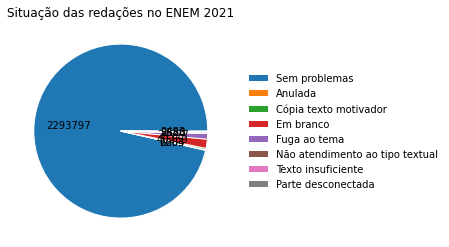

In [12]:
#Gráfico pizza de situação da redação
redacao_dic = {1:"Sem problemas", 2:"Anulada", 3:"Cópia texto motivador", 4:"Em branco", 6:"Fuga ao tema",
               7:"Não atendimento ao tipo textual", 8:"Texto insuficiente", 9:"Parte desconectada"}
df_aux = df[["NU_INSCRICAO", "TP_STATUS_REDACAO"]]
df_aux = df_aux.groupby("TP_STATUS_REDACAO", as_index=False).agg(CONT_STATUS_REDACAO=("NU_INSCRICAO","count"))
df_aux["STATUS_REDACAO"] = df_aux["TP_STATUS_REDACAO"].apply(lambda x: redacao_dic[x])

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(df_aux["CONT_STATUS_REDACAO"], autopct=lambda x:'{:.0f}'.format(x*df_aux["CONT_STATUS_REDACAO"].values.sum()/100), wedgeprops={"linewidth":1, "edgecolor":"white"}, frame=False)
ax.set_title("Situação das redações no ENEM 2021")
ax.legend(wedges, redacao_dic.values(), loc=5, bbox_to_anchor=(2, 0.5), frameon=False)
plt.show()

C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/217122585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["CO_REGIAO"] = df_aux["CO_MUNICIPIO_PROVA"].values/1000000
C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/217122585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["CO_REGIAO"] = df_aux["CO_REGIAO"].astype(int)
C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/217122585.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

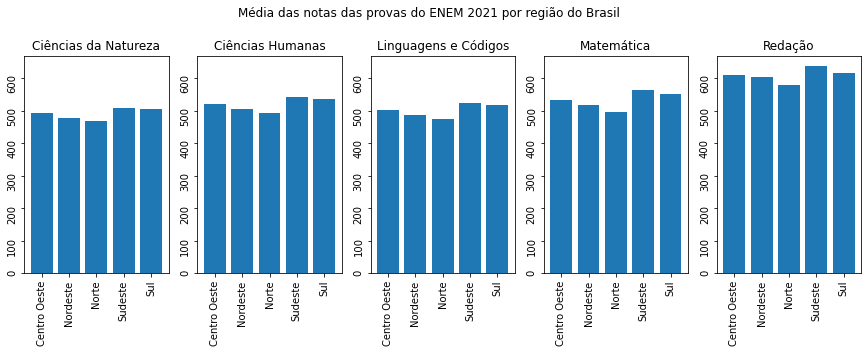

In [13]:
#Gráfico de barras das notas médias na prova objetiva e redação por região
regiao_dic = {1:"Norte", 2:"Nordeste", 3:"Sudeste", 4:"Sul", 5:"Centro Oeste"}
lista_provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
df_aux = df[["CO_MUNICIPIO_PROVA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]]
df_aux["CO_REGIAO"] = df_aux["CO_MUNICIPIO_PROVA"].values/1000000
df_aux["CO_REGIAO"] = df_aux["CO_REGIAO"].astype(int)
df_aux["REGIAO"] = df_aux["CO_REGIAO"].apply(lambda x: regiao_dic[x])
df_aux = df_aux.drop(labels="CO_MUNICIPIO_PROVA", axis=1)
df_aux = df_aux.groupby("REGIAO",as_index=False).mean()

nota_max = df_aux[lista_provas].max().max()*1.05

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.set_figwidth(15)
fig.set_figheight(4)

ax1.bar(df_aux["REGIAO"], df_aux["NU_NOTA_CN"])
ax1.tick_params(labelrotation=90)
ax1.set_ylim([0, nota_max])
ax1.set_title("Ciências da Natureza")

ax2.bar(df_aux["REGIAO"], df_aux["NU_NOTA_CH"])
ax2.tick_params(labelrotation=90)
ax2.set_ylim([0, nota_max])
ax2.set_title("Ciências Humanas")

ax3.bar(df_aux["REGIAO"], df_aux["NU_NOTA_LC"])
ax3.tick_params(labelrotation=90)
ax3.set_ylim([0, nota_max])
ax3.set_title("Linguagens e Códigos")

ax4.bar(df_aux["REGIAO"], df_aux["NU_NOTA_MT"])
ax4.tick_params(labelrotation=90)
ax4.set_ylim([0, nota_max])
ax4.set_title("Matemática")

ax5.bar(df_aux["REGIAO"], df_aux["NU_NOTA_REDACAO"])
ax5.tick_params(labelrotation=90)
ax5.set_ylim([0, nota_max])
ax5.set_title("Redação")

fig.suptitle("Média das notas das provas do ENEM 2021 por região do Brasil", y=1.05)

plt.show()

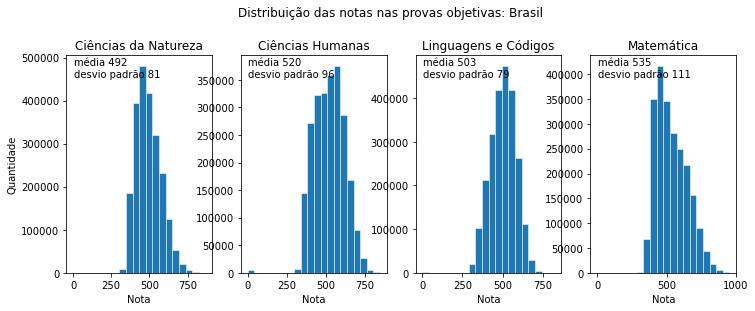

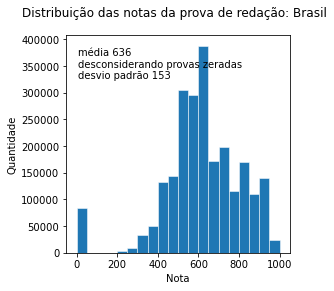

In [14]:
#Histograma das notas provas objetivas e redação no Brasil
df_aux = df[["NU_INSCRICAO", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]]

def hist_notas_objetivas(fig, ax1, ax2, ax3, ax4, df, fator):
    fig.set_figwidth(12)
    fig.set_figheight(4)
    ax1.hist(df["NU_NOTA_CN"].dropna(), bins=20, linewidth=0.5, edgecolor="white")
    ax1.text(0.05, 0.9, "média " + str(round(df["NU_NOTA_CN"].mean())) + "\ndesvio padrão " + str(round(df["NU_NOTA_CN"].std())),transform=ax1.transAxes)
    ax1.set_title("Ciências da Natureza")
    ax1.set_xlabel("Nota")
    ax1.set_ylabel("Quantidade")
    ax2.hist(df_aux["NU_NOTA_CH"].dropna(), bins=20, linewidth=0.5, edgecolor="white")
    ax2.text(0.05, 0.9, "média " + str(round(df["NU_NOTA_CH"].mean())) + "\ndesvio padrão " + str(round(df["NU_NOTA_CH"].std())),transform=ax2.transAxes)
    ax2.set_title("Ciências Humanas")
    ax2.set_xlabel("Nota")
    ax3.hist(df_aux["NU_NOTA_LC"].dropna(), bins=20, linewidth=0.5, edgecolor="white")
    ax3.text(0.05, 0.9, "média " + str(round(df["NU_NOTA_LC"].mean())) + "\ndesvio padrão " + str(round(df["NU_NOTA_LC"].std())),transform=ax3.transAxes)
    ax3.set_title("Linguagens e Códigos")
    ax3.set_xlabel("Nota")
    ax4.hist(df_aux["NU_NOTA_MT"].dropna(), bins=20, linewidth=0.5, edgecolor="white")
    ax4.text(0.05, 0.9, "média " + str(round(df["NU_NOTA_MT"].mean())) + "\ndesvio padrão " + str(round(df["NU_NOTA_MT"].std())),transform=ax4.transAxes)
    ax4.set_title("Matemática")
    ax4.set_xlabel("Nota")
    fig.suptitle("Distribuição das notas nas provas objetivas: {}".format(fator), y=1.05)
    plt.show()

def hist_notas_redacao(fig, ax, df, fator):
    fig.set_figwidth(4)
    ax.hist(df["NU_NOTA_REDACAO"].dropna(), bins=20, linewidth=0.5, edgecolor="white")
    ax.text(0.05, 0.8, "média " + str(round(df[df["NU_NOTA_REDACAO"]!=0]["NU_NOTA_REDACAO"].mean())) + "\ndesconsiderando provas zeradas" + "\ndesvio padrão " + str(round(df[df["NU_NOTA_REDACAO"]!=0]["NU_NOTA_REDACAO"].std())),
             transform=ax.transAxes)
    fig.suptitle("Distribuição das notas da prova de redação: {}".format(fator))
    ax.set_ylabel("Quantidade")
    ax.set_xlabel("Nota")
    plt.show()
    
    
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
hist_notas_objetivas(fig1, ax1, ax2, ax3, ax4, df_aux, "Brasil")

fig2, ax = plt.subplots()
hist_notas_redacao(fig2, ax, df_aux, "Brasil")

C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/3119631172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["CO_REGIAO"] = df_aux["CO_MUNICIPIO_PROVA"].values/1000000
C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/3119631172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["CO_REGIAO"] = df_aux["CO_REGIAO"].astype(int)
C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/3119631172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

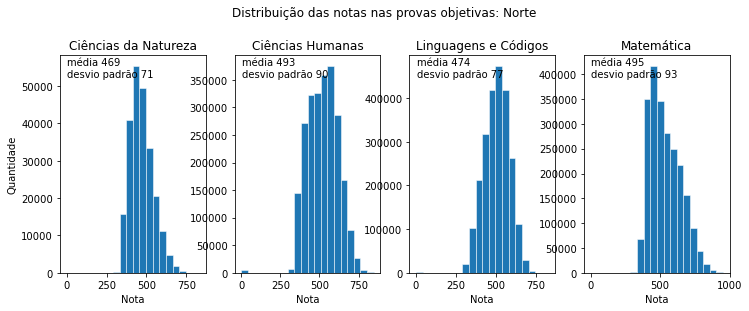

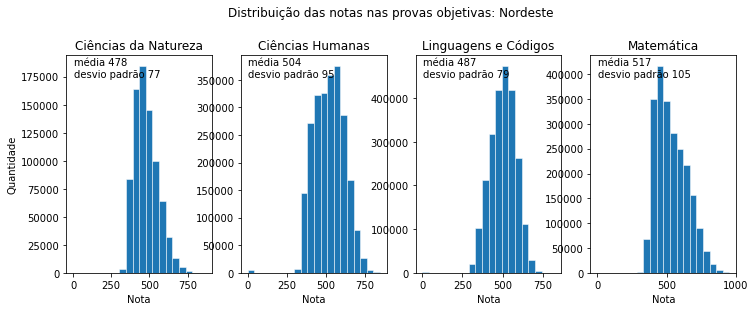

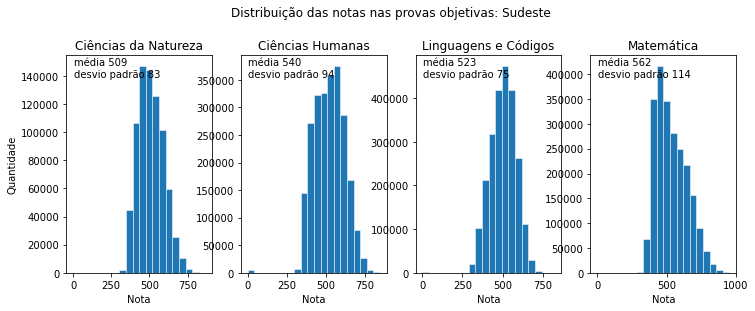

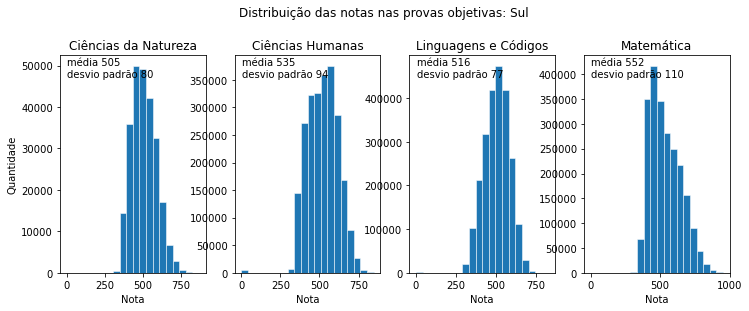

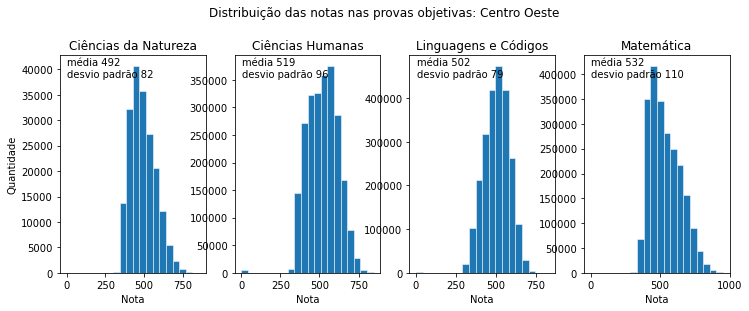

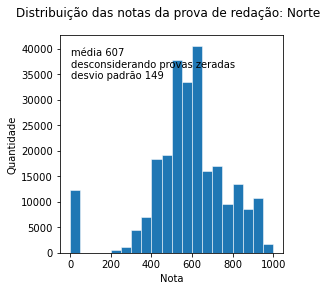

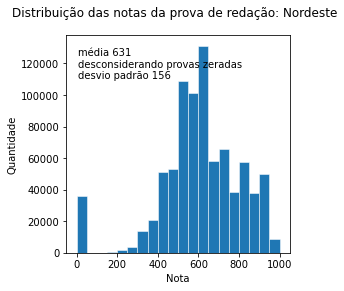

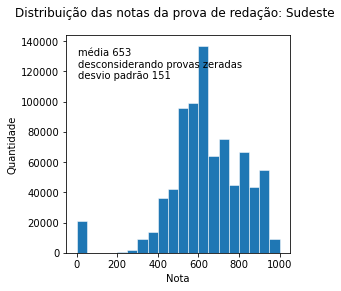

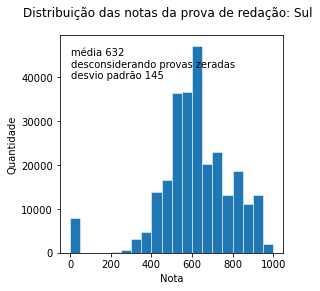

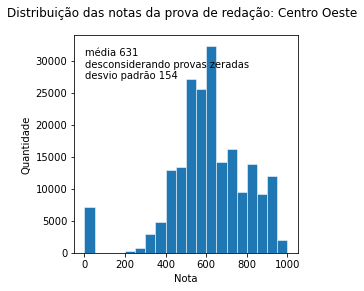

In [15]:
#Histograma das notas provas objetivas e redação por região
regiao_dic = {1:"Norte", 2:"Nordeste", 3:"Sudeste", 4:"Sul", 5:"Centro Oeste"}
df_aux = df[["NU_INSCRICAO", "CO_MUNICIPIO_PROVA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]]
df_aux["CO_REGIAO"] = df_aux["CO_MUNICIPIO_PROVA"].values/1000000
df_aux["CO_REGIAO"] = df_aux["CO_REGIAO"].astype(int)
df_aux["REGIAO"] = df_aux["CO_REGIAO"].apply(lambda x: regiao_dic[x])

for key, item in regiao_dic.items():
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    hist_notas_objetivas(fig, ax1, ax2, ax3, ax4, df_aux[df_aux["REGIAO"]==item], item)
    
for key, item in regiao_dic.items():
    fig, ax = plt.subplots()
    hist_notas_redacao(fig, ax, df_aux[df_aux["REGIAO"]==item], item)

C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/2763523656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["CO_REGIAO"] = df_aux["CO_MUNICIPIO_PROVA"].values/1000000
C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/2763523656.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["CO_REGIAO"] = df_aux["CO_REGIAO"].astype(int)
C:\Users\Yojo\AppData\Local\Temp/ipykernel_21256/2763523656.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

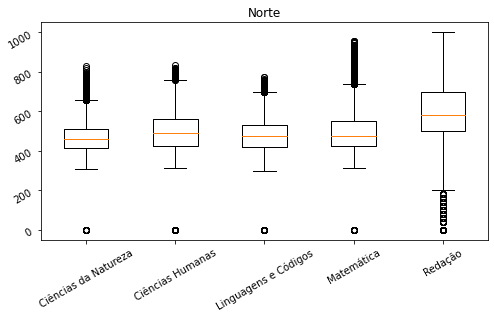

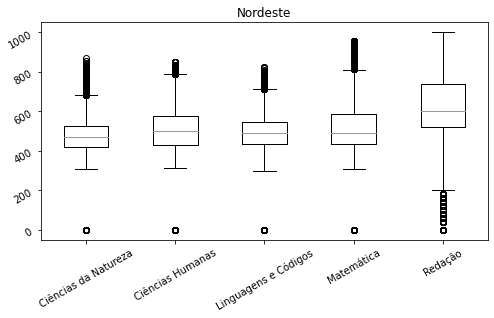

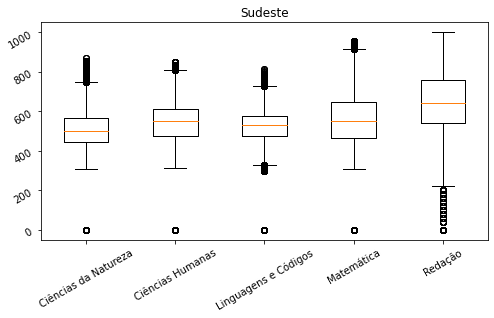

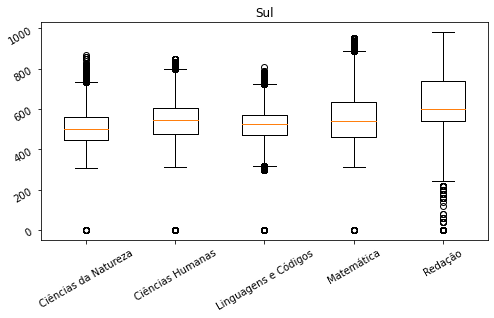

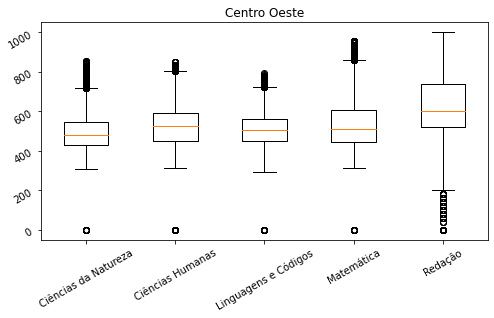

In [16]:
#Boxplot das notas provas objetivas e redação por região
regiao_dic = {1:"Norte", 2:"Nordeste", 3:"Sudeste", 4:"Sul", 5:"Centro Oeste"}
lista_provas = ["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação"]
df_aux = df[["NU_INSCRICAO", "CO_MUNICIPIO_PROVA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]]
df_aux["CO_REGIAO"] = df_aux["CO_MUNICIPIO_PROVA"].values/1000000
df_aux["CO_REGIAO"] = df_aux["CO_REGIAO"].astype(int)
df_aux["REGIAO"] = df_aux["CO_REGIAO"].apply(lambda x: regiao_dic[x])

for key, item in regiao_dic.items():
    df_temp = df_aux[df_aux["REGIAO"]==item].dropna()
    fig, ax = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(4)
    ax.boxplot(df_temp[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]], labels=lista_provas)
    ax.set_title(item)
    ax.tick_params(labelrotation=30)

plt.show()

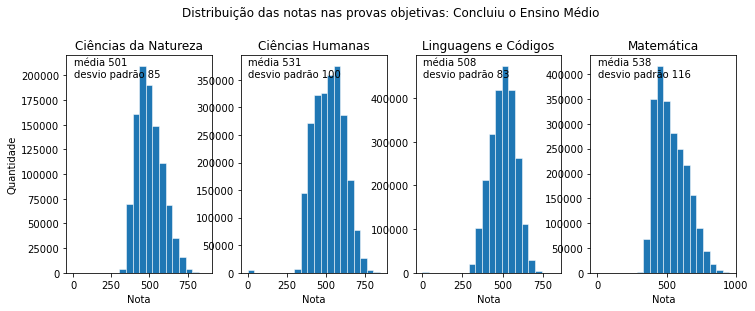

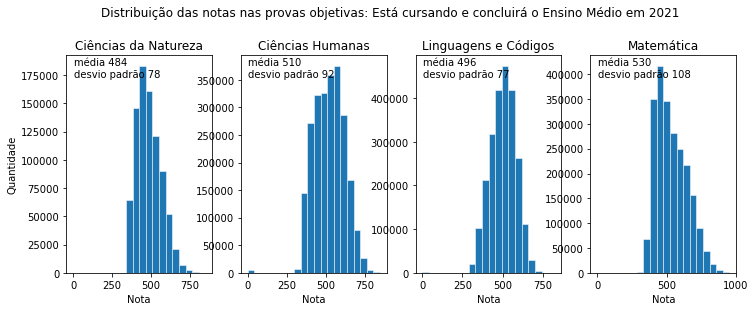

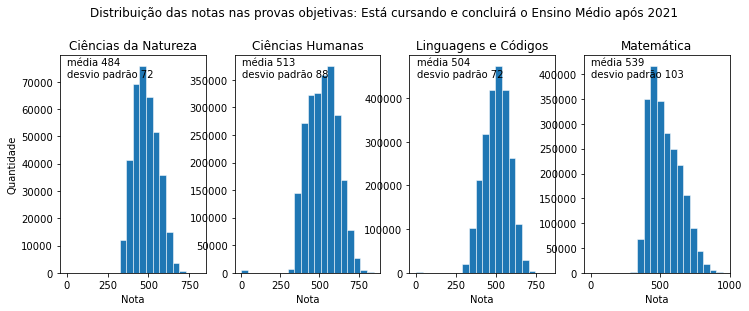

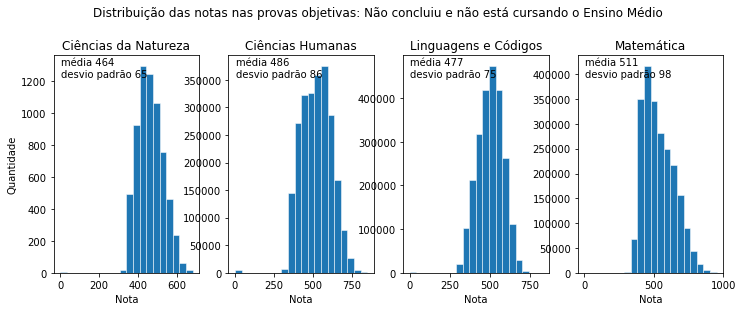

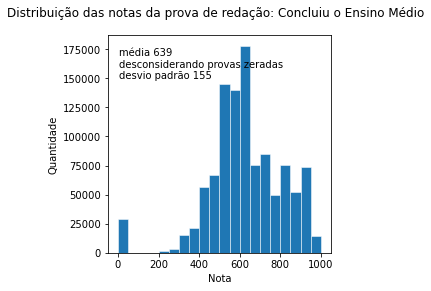

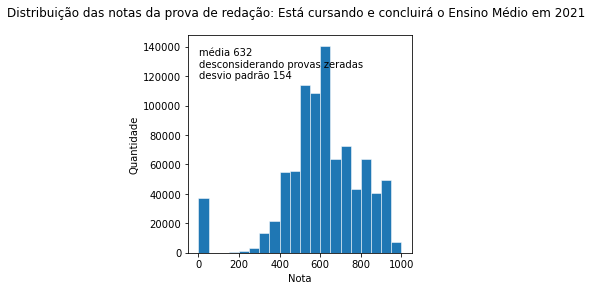

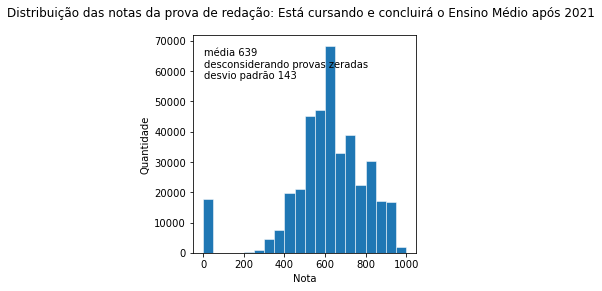

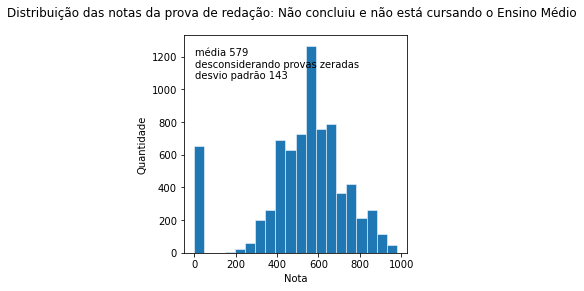

In [17]:
#Histograma das notas provas objetivas e redação por situação de conclusão do ensino médio
conclusao_dic = {1:"Concluiu o Ensino Médio", 2:"Está cursando e concluirá o Ensino Médio em 2021", 3:"Está cursando e concluirá o Ensino Médio após 2021", 4:"Não concluiu e não está cursando o Ensino Médio"}
df_aux = df[["NU_INSCRICAO", "CO_MUNICIPIO_PROVA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "TP_ST_CONCLUSAO"]]

for key, item in conclusao_dic.items():
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    hist_notas_objetivas(fig, ax1, ax2, ax3, ax4, df_aux[df_aux["TP_ST_CONCLUSAO"]==key], item)
    
for key, item in conclusao_dic.items():
    fig, ax = plt.subplots()
    hist_notas_redacao(fig, ax, df_aux[df_aux["TP_ST_CONCLUSAO"]==key], item)

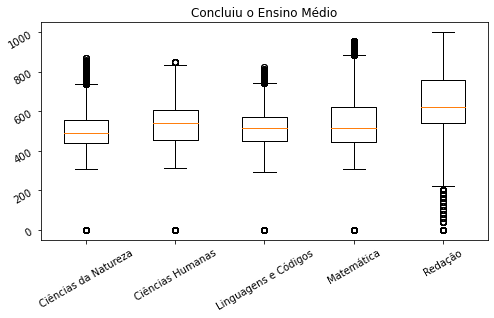

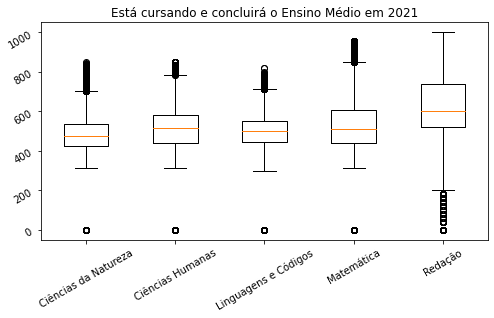

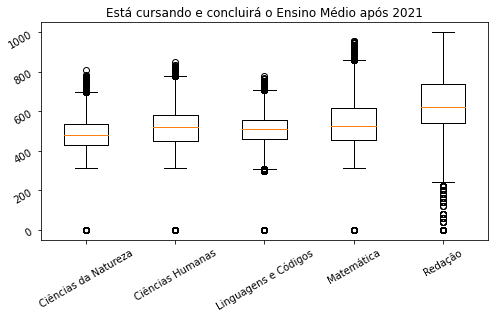

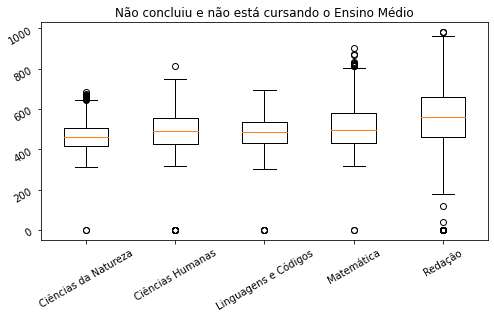

In [18]:
#Boxplot das notas provas objetivas e redação por situação de conclusão do ensino médio
conclusao_dic = {1:"Concluiu o Ensino Médio", 2:"Está cursando e concluirá o Ensino Médio em 2021", 3:"Está cursando e concluirá o Ensino Médio após 2021", 4:"Não concluiu e não está cursando o Ensino Médio"}
lista_provas = ["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação"]
df_aux = df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "TP_ST_CONCLUSAO"]]

for key, item in conclusao_dic.items():
    df_temp = df_aux[df_aux["TP_ST_CONCLUSAO"]==key].dropna()
    fig, ax = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(4)
    ax.boxplot(df_temp[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]], labels=lista_provas)
    ax.set_title(item)
    ax.tick_params(labelrotation=30)

plt.show()

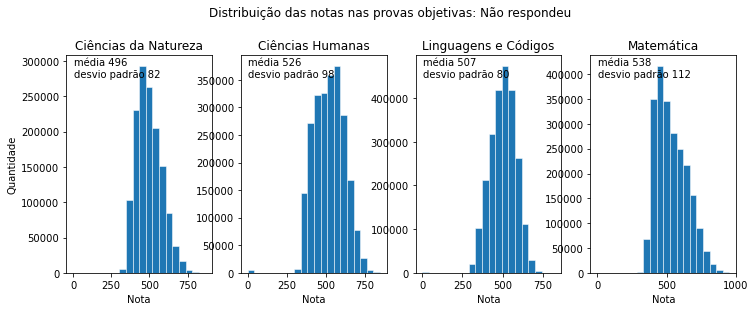

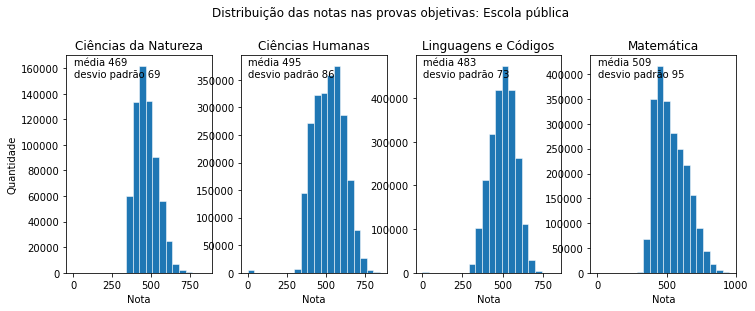

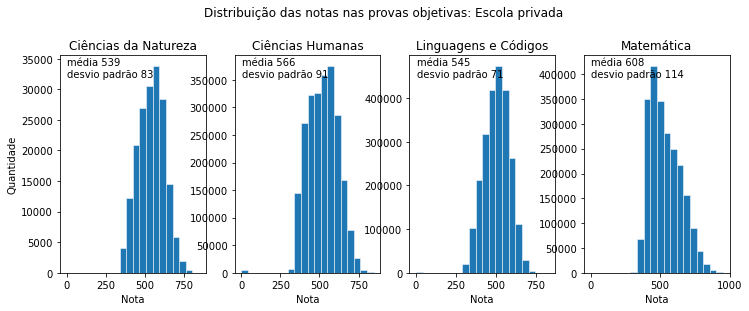

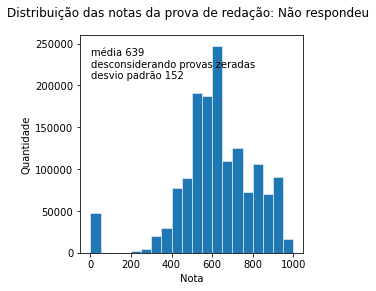

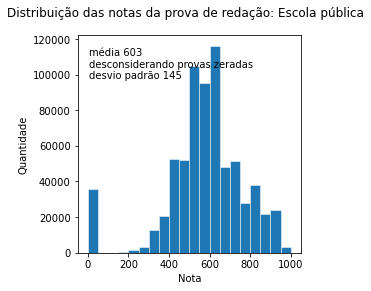

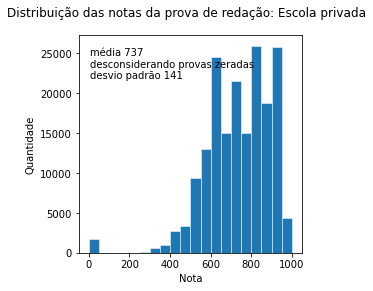

In [19]:
#Histograma das notas provas objetivas e redação por tipo de escola no ensino médio
conclusao_dic = {1:"Não respondeu", 2:"Escola pública", 3:"Escola privada"}
df_aux = df[["NU_INSCRICAO", "TP_ESCOLA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]]

for key, item in conclusao_dic.items():
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    hist_notas_objetivas(fig, ax1, ax2, ax3, ax4, df_aux[df_aux["TP_ESCOLA"]==key], item)
    
for key, item in conclusao_dic.items():
    fig, ax = plt.subplots()
    hist_notas_redacao(fig, ax, df_aux[df_aux["TP_ESCOLA"]==key], item)

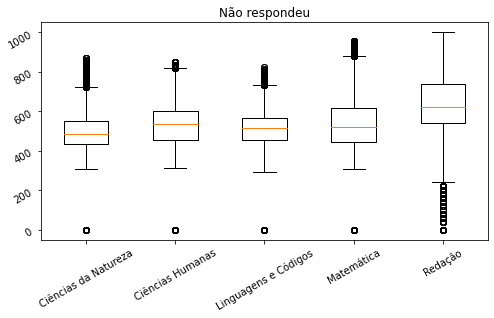

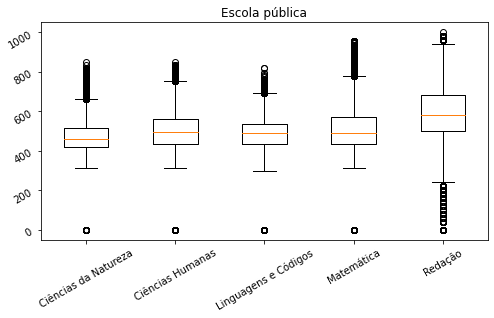

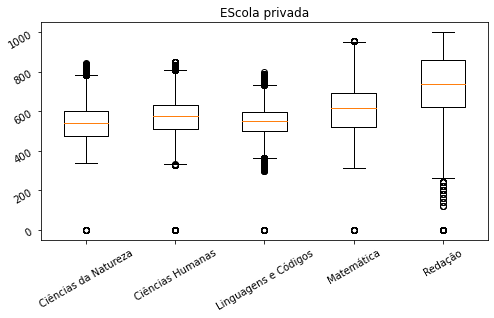

In [20]:
#Boxplot das notas provas objetivas e redação por tipo de escola no ensino médio
conclusao_dic = {1:"Não respondeu", 2:"Escola pública", 3:"EScola privada"}
df_aux = df[["TP_ESCOLA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]]
lista_provas = ["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação"]

for key, item in conclusao_dic.items():
    df_temp = df_aux[df_aux["TP_ESCOLA"]==key].dropna()
    fig, ax = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(4)
    ax.boxplot(df_temp[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]], labels=lista_provas)
    ax.set_title(item)
    ax.tick_params(labelrotation=30)

plt.show()

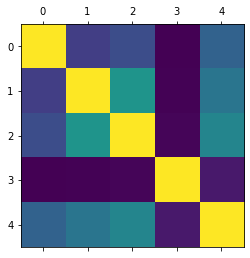

In [23]:
#Analisando correlações entre atributos
q001_dic = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "H":8}
q002_dic = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "H":8}
q006_dic = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "H":8, "I":9, "J":10, "K":11, "L":12, "M":13, "N":14, "O":15, "P":16, "Q":17}

df_aux = df[["NU_NOTA_REDACAO", "Q001", "Q002", "Q005", "Q006"]].dropna()
df_aux["Q001"] = df_aux["Q001"].apply(lambda x: q001_dic[x])
df_aux["Q002"] = df_aux["Q002"].apply(lambda x: q002_dic[x])
df_aux["Q006"] = df_aux["Q006"].apply(lambda x: q006_dic[x])

corr_df = df_aux.corr(method="pearson")
plt.matshow(corr_df)
plt.show()

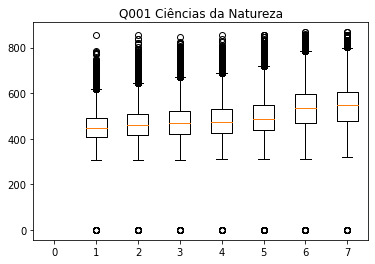

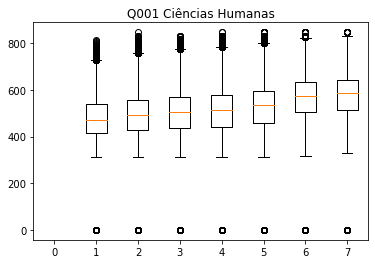

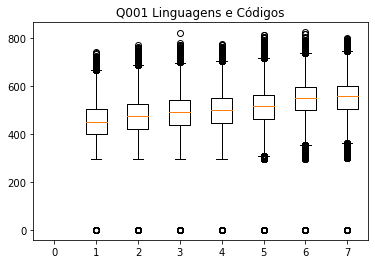

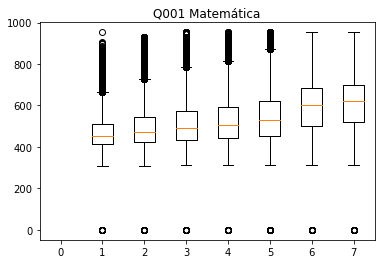

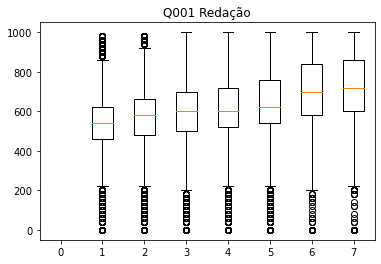

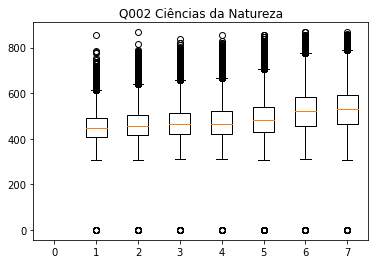

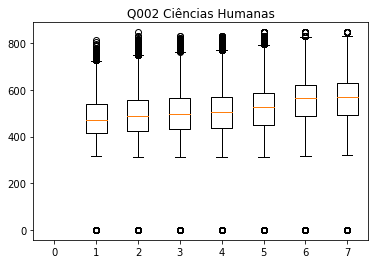

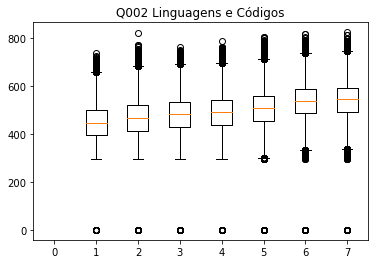

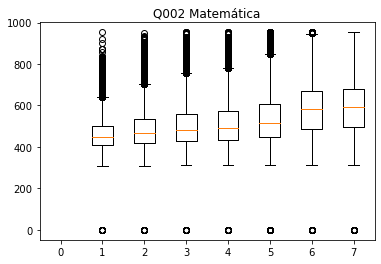

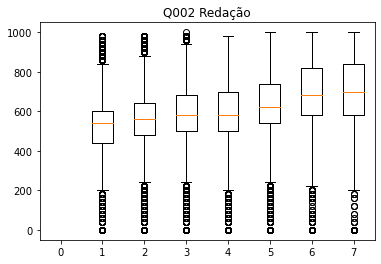

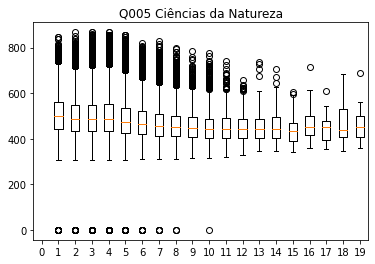

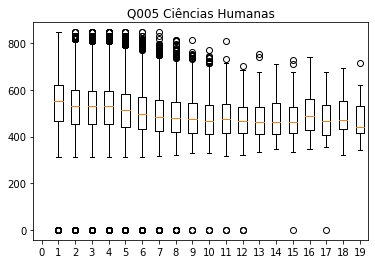

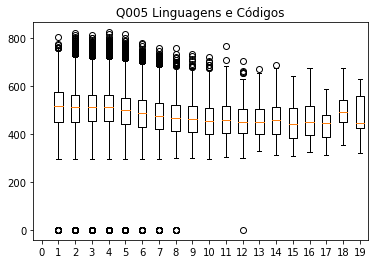

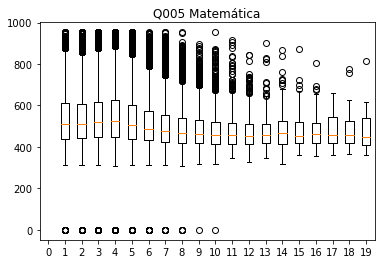

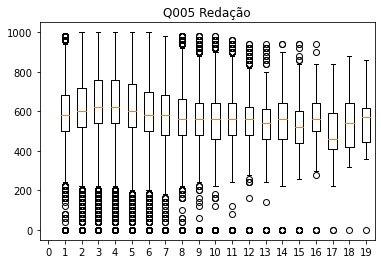

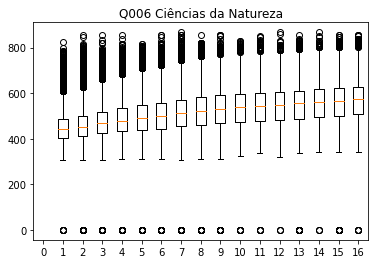

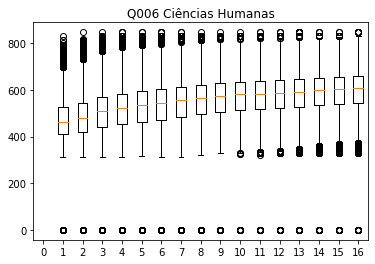

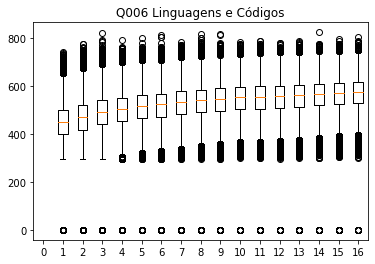

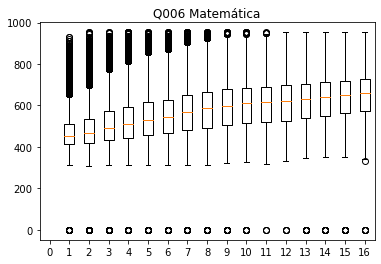

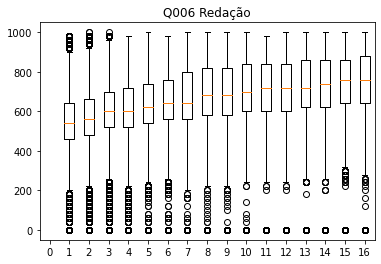

In [24]:
#Boxplot das notas em relação às questões Q001, Q002, Q005, Q006
#Q001 Até que série seu pai, ou o homem responsável por você, estudou?
#Q002 Até que série sua mãe, ou a mulher responsável por você, estudou?
#Q005 Incluindo você, quantas pessoas moram atualmente em sua residência?
#Q006 Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares)
questoes_dic = {"Q001":8, "Q002":8, "Q005":20, "Q006":17}
provas_dic = {"NU_NOTA_CN":"Ciências da Natureza", "NU_NOTA_CH":"Ciências Humanas", "NU_NOTA_LC":"Linguagens e Códigos", "NU_NOTA_MT":"Matemática", "NU_NOTA_REDACAO":"Redação"}

df_aux = df[["Q001", "Q002", "Q005", "Q006", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].dropna()
df_aux["Q005"] = df_aux["Q005"].apply(lambda x: chr(ord('@')+int(x)))

lista_valores = []
for key_questoes, item_questoes in questoes_dic.items():
    df_aux = df_aux.sort_values(key_questoes)
    for key_prova, item_prova in provas_dic.items():
        for i in range(item_questoes):
            lista_valores.append(df_aux[df_aux[key_questoes]==chr(ord('@')+i)][key_prova].values)
        fig, ax = plt.subplots()
        ax.boxplot(lista_valores, labels=range(item_questoes))
        ax.set_title(key_questoes + " " + item_prova)
        plt.plot()
        lista_valores = []

[]

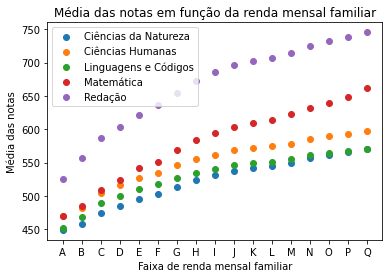

In [25]:
#Gráfico das notas médias com as questão Q006
df_aux = df[["Q006", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]]
df_aux = df_aux.groupby("Q006",as_index=False).mean()

fig, ax = plt.subplots()
ax.scatter(x=df_aux["Q006"], y=df_aux["NU_NOTA_CN"], label="Ciências da Natureza")
ax.scatter(x=df_aux["Q006"], y=df_aux["NU_NOTA_CH"], label="Ciências Humanas")
ax.scatter(x=df_aux["Q006"], y=df_aux["NU_NOTA_LC"], label="Linguagens e Códigos")
ax.scatter(x=df_aux["Q006"], y=df_aux["NU_NOTA_MT"], label="Matemática")
ax.scatter(x=df_aux["Q006"], y=df_aux["NU_NOTA_REDACAO"], label="Redação")
ax.legend()
ax.set_title("Média das notas em função da renda mensal familiar")
ax.set_xlabel("Faixa de renda mensal familiar")
ax.set_ylabel("Média das notas")
plt.plot()

## Aplicando Machine Learning
Duas abordagens foram testadas:
1) Utilizando algoritmos supervisionados de classificação para avaliar se é possível prever se um aluno veio de uma escola pública ou particular.

2) Utilizando algoritmos não supervisionados de clusterização para avaliar se é possível distinguir grupos de alunos e suas características dentre todos os alunos.

In [26]:
#Primeira abordagem
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

df = pd.read_csv(filepath_or_buffer = "microdados_enem_2021_amostra.csv", sep = ";", encoding = "latin1")
#Selecionando alguns parâmetros para o treinamento
df_aux = df[["TP_FAIXA_ETARIA", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "Q001", "Q002", "Q005", "Q006", "Q025", "TP_ESCOLA"]].dropna()

#Transformando valores char para valores inteiros
df_aux["Q001"] = df_aux["Q001"].apply(lambda x: ord(x)-64)
df_aux["Q002"] = df_aux["Q002"].apply(lambda x: ord(x)-64)
df_aux["Q006"] = df_aux["Q006"].apply(lambda x: ord(x)-64)
df_aux["Q025"] = df_aux["Q025"].apply(lambda x: ord(x)-64)

df_aux.loc[df_aux["TP_ESCOLA"]==3, "TP_ESCOLA"] = "Privada"
df_aux.loc[df_aux["TP_ESCOLA"]==2, "TP_ESCOLA"] = "Publica"
df_aux = df_aux.drop(df_aux[df_aux["TP_ESCOLA"]==1].index)

#Igualando a quantidade de amostras de cada categoria
qtd_privada = sum(df_aux["TP_ESCOLA"]=="Privada")
qtd_publica = sum(df_aux["TP_ESCOLA"]=="Publica")
if qtd_privada > qtd_publica:
    df_aux = df_aux.drop(df_aux[df_aux["TP_ESCOLA"]=="Privada"].sample(qtd_privada-qtd_publica).index)
elif qtd_privada < qtd_publica:
    df_aux = df_aux.drop(df_aux[df_aux["TP_ESCOLA"]=="Publica"].sample(qtd_publica-qtd_privada).index)

#Normalizando os dados
atributos = ["TP_FAIXA_ETARIA", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "Q001", "Q002", "Q005", "Q006", "Q025"]
std = StandardScaler()
df_aux[atributos] = std.fit_transform(df_aux[atributos])

#Separando dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df_aux.drop("TP_ESCOLA", axis = 1), df_aux["TP_ESCOLA"], test_size=0.2, random_state=10)

#Testando alguns algoritmos de classificação com hiper-parâmetros padrão:
#Logistic Regression
clf = LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("O modelo Logistic Regression resultou em um acurácia de {}".format(scores.mean()))

#K-Nearest Neighbors
clf = KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("O modelo K-Nearest Neighbors resultou em um acurácia de {}".format(scores.mean()))

#Random Forest
clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("O modelo Random Forest resultou em um acurácia de {}".format(scores.mean()))

#Support Vector Machine
clf = svm.SVC()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("O modelo Support Vector Machine resultou em um acurácia de {}".format(scores.mean()))


O modelo Logistic Regression resultou em um acurácia de 0.8018815600642533
O modelo K-Nearest Neighbors resultou em um acurácia de 0.7193134762787807
O modelo Random Forest resultou em um acurácia de 0.7975853099050019
O modelo Support Vector Machine resultou em um acurácia de 0.801766090125871


In [27]:
#Segunda abordagem
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from IPython.display import display, HTML

df = pd.read_csv(filepath_or_buffer = "microdados_enem_2021_amostra.csv", sep = ";", encoding = "latin1")
#Selecionando alguns parâmetros para o treinamento
df_aux = df[["TP_FAIXA_ETARIA", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "Q001", "Q002", "Q005", "Q006", "Q025", "TP_ESCOLA"]].dropna()

#Transformando valores char para valores inteiros
df_aux["Q001"] = df_aux["Q001"].apply(lambda x: ord(x)-64)
df_aux["Q002"] = df_aux["Q002"].apply(lambda x: ord(x)-64)
df_aux["Q006"] = df_aux["Q006"].apply(lambda x: ord(x)-64)
df_aux["Q025"] = df_aux["Q025"].apply(lambda x: ord(x)-64)

df_aux = df_aux.drop(df_aux[df_aux["TP_ESCOLA"]==1].index)
df_aux.loc[df_aux["TP_ESCOLA"]==3, "TP_ESCOLA"] = 1
df_aux.loc[df_aux["TP_ESCOLA"]==2, "TP_ESCOLA"] = -1

#Normalizando os dados
atributos = ["TP_FAIXA_ETARIA", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", "Q001", "Q002", "Q005", "Q006", "Q025", "TP_ESCOLA"]
std = StandardScaler()
X = std.fit_transform(df_aux[atributos])

#Testando alguns algoritmos de clusterização:
#K-Means
kmeans = KMeans(n_clusters=2, random_state=0).fit(X);
df_aux["grupo"] = kmeans.predict(X);
print("{} alunos classificados no grupo 0".format(np.sum(df_aux["grupo"]==0)))
print("{} alunos classificados no grupo 1".format(np.sum(df_aux["grupo"]==1)))
display(df_aux.groupby("grupo").agg([np.mean, np.std]))

#Agglomerative Clustering
df_aux = df_aux.drop(columns="grupo")
clustering  = AgglomerativeClustering().fit(X);
df_aux["grupo"] = clustering.fit_predict(X);
print("{} alunos classificados no grupo 0".format(np.sum(df_aux["grupo"]==0)))
print("{} alunos classificados no grupo 1".format(np.sum(df_aux["grupo"]==1)))
display(HTML(df_aux.groupby("grupo").agg([np.mean, np.std]).to_html()))

18719 alunos classificados no grupo 0
6365 alunos classificados no grupo 1


TP_FAIXA_ETARIA           TP_ST_CONCLUSAO      TP_ANO_CONCLUIU       \
                 mean       std            mean  std            mean  std   
grupo                                                                       
0            2.869331  1.274538             2.0  0.0             0.0  0.0   
1            2.405027  0.606874             2.0  0.0             0.0  0.0   

       NU_NOTA_CN             NU_NOTA_CH             NU_NOTA_LC             \
             mean        std        mean        std        mean        std   
grupo                                                                        
0      466.560404  67.125189  495.329024  83.623965  481.915898  71.213513   
1      538.595821  83.355715  567.152427  91.511884  546.589065  70.515419   

       NU_NOTA_MT             NU_NOTA_REDACAO                  Q001            \
             mean         std            mean         std      mean       std   
grupo                                                                           
0      503.920941   92.599352      580.757519  184.875394  4.289278  1.814076   
1      608.230071  114.436312      727.267871  158.009792  5.807070  1.214766   

           Q002                Q005                Q006                Q025  \
           mean       std      mean       std      mean       std      mean   
grupo                                                                         
0      4.542711  1.516720  3.963780  1.314793  3.679363  2.141105  1.893905   
1      5.998900  1.013345  3.755852  1.050021  9.879969  4.277907  1.998115   

                TP_ESCOLA            
            std      mean       std  
grupo                                
0      0.307968 -0.985362  0.170477  
1      0.043383  0.648075  0.761636

19736 alunos classificados no grupo 0
5348 alunos classificados no grupo 1
